In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap

In [5]:
df = pd.read_csv("final_df.csv")
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(df.drop('is_corona_positive', axis=1), df['is_corona_positive'], test_size=0.2, random_state=42)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled, X_test_scaled = scaler.transform(X_valid), scaler.transform(X_test)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns).reset_index(drop=True)
X_valid_df = pd.DataFrame(X_valid_scaled, columns=X_valid.columns).reset_index(drop=True)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns).reset_index(drop=True)

y_train_df = pd.DataFrame(y_train, columns=['is_corona_positive']).reset_index(drop=True)
y_valid_df = pd.DataFrame(y_valid, columns=['is_corona_positive']).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test, columns=['is_corona_positive']).reset_index(drop=True)

In [10]:
pca = PCA(n_components = 3)
principal_components = pca.fit_transform(X_train_df)
print("{:.1%}".format(sum(pca.explained_variance_ratio_)), 'variance of features explained')

65.0% variance of features explained


In [11]:
# Look at loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3'],
                        index = X_train_df.columns )
loadings.sort_values('PC1').head(13)

,PC1,PC2,PC3
days_since_start,-0.517987,0.385293,0.010305
age_60_and_above_None,-0.489719,0.338911,0.300081
test_indication_Other,-0.448259,-0.553882,-0.042717
gender_male,-0.079960,0.151583,-0.632490
age_60_and_above_Yes,0.201907,-0.230342,-0.368396
gender_None,0.231504,-0.239116,0.606608
test_indication_Contact with confirmed,0.265736,0.224430,-0.019258
test_indication_Abroad,0.345773,0.496310,0.062578


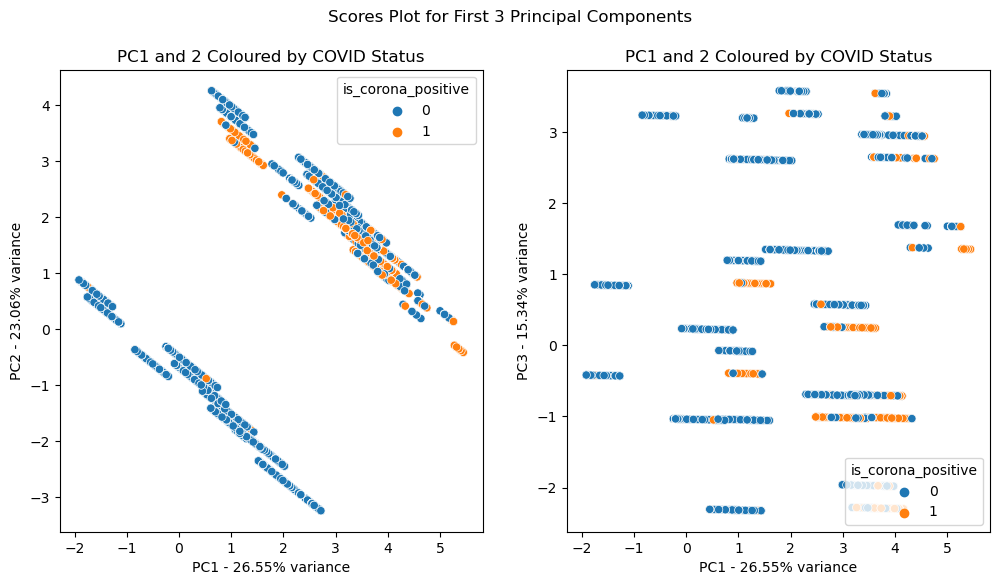

In [12]:
fig, axes = plt.subplots(1,2, figsize = (12,6))
g = sns.scatterplot(x = principal_components[:,0], y =principal_components[:,1], hue = y_train_df['is_corona_positive'], ax = axes[0])
g.set(xlabel = 'PC1 - ' + str(round(pca.explained_variance_ratio_[0] *100, 2))  +'% variance',
         ylabel = 'PC2 - ' + str(round(pca.explained_variance_ratio_[1] *100, 2))  +'% variance',
         title = 'PC1 and 2 Coloured by COVID Status')
f = sns.scatterplot(x = principal_components[:,0], y =principal_components[:,2], ax = axes[1],hue = y_train_df['is_corona_positive'] )
f.set(xlabel = 'PC1 - ' + str(round(pca.explained_variance_ratio_[0] *100, 2))  +'% variance',
      ylabel =  'PC3 - ' + str(round(pca.explained_variance_ratio_[2] *100, 2))+'% variance',
      title = 'PC1 and 2 Coloured by COVID Status')
fig.suptitle('Scores Plot for First 3 Principal Components')
None

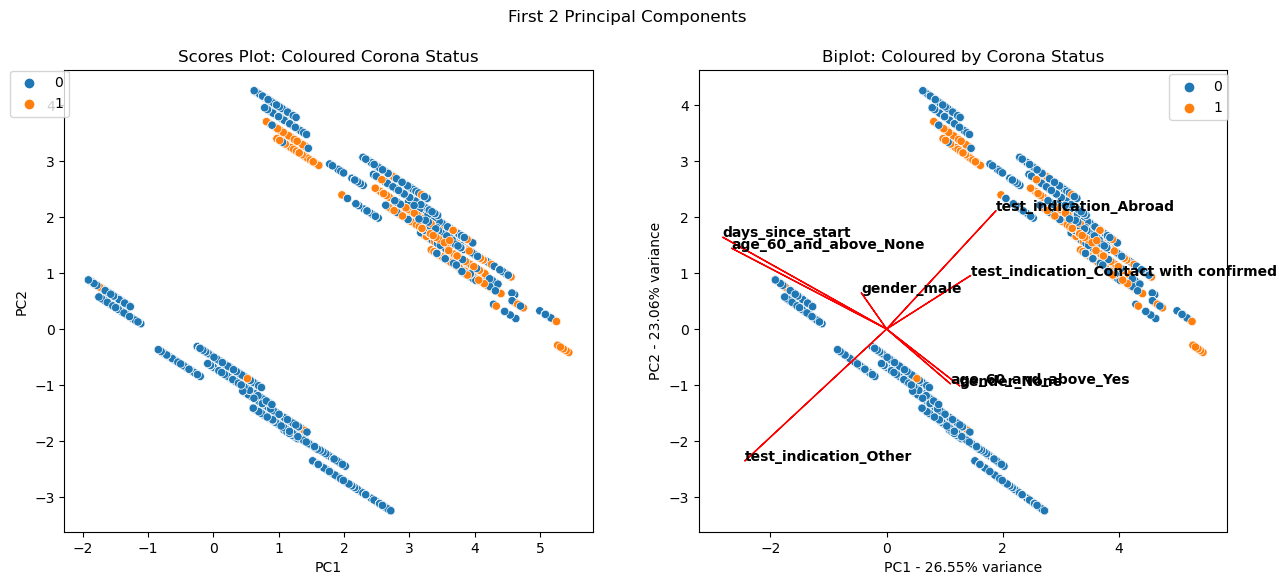

In [13]:
x_loading = loadings['PC1']
y_loading = loadings['PC2']
x_score = principal_components[:,0]
y_score = principal_components[:,1]
fig, axes = plt.subplots(1,2, figsize = (15,6))

g = sns.scatterplot(x = principal_components[:,0], y =principal_components[:,1], hue =  y_train_df['is_corona_positive'], ax = axes[0])
g.set(xlabel = 'PC1', ylabel = 'PC2',title = 'Scores Plot: Coloured Corona Status')
g.legend(bbox_to_anchor=(0.01, 1),borderaxespad=0.06)
f = sns.scatterplot(x = principal_components[:,0], y =principal_components[:,1], hue =  y_train_df['is_corona_positive'], ax = axes[1])
for i, varnames in enumerate(loadings.index):
    f.arrow(
        0, 0, # coordinates of arrow base
        x_loading[i] * max(x_score), # length of the arrow along x
        y_loading[i] * max(y_score), # length of the arrow along y
        color='r'
        )
    f.text(x_loading[i]* max(x_score), y_loading[i]* max(y_score), varnames, weight = 'bold')
f.set(xlabel = 'PC1 - ' + str(round(pca.explained_variance_ratio_[0] *100, 2))  +'% variance',
         ylabel = 'PC2 - ' + str(round(pca.explained_variance_ratio_[1] *100, 2))  +'% variance',
         title = 'Biplot: Coloured by Corona Status')
f.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0.3)
fig.suptitle('First 2 Principal Components')


None

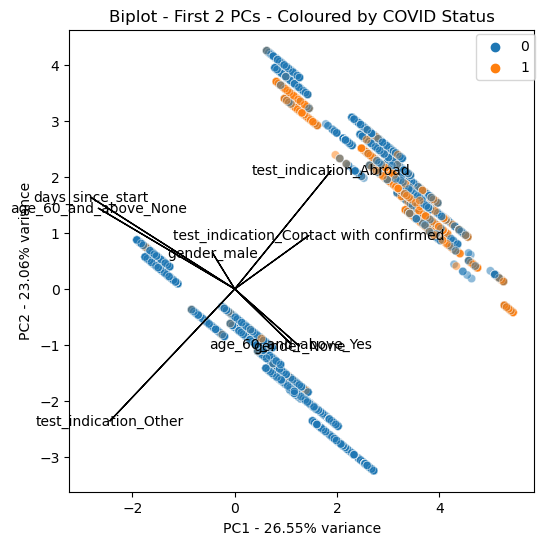

In [14]:
#Biplot
plt.figure(figsize = (6,6))
x_loading = loadings['PC1']
y_loading = loadings['PC2']
x_score = principal_components[:,0]
y_score = principal_components[:,1]
 
ax = sns.scatterplot(x = principal_components[:,0], y =principal_components[:,1], hue = y_train_df['is_corona_positive'], alpha = 0.5)
ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0.3)
 
for i, varnames in enumerate(loadings.index):
    plt.arrow(
        0, 0, # coordinates of arrow base
        x_loading[i] * max(x_score), # length of the arrow along x
        y_loading[i] * max(y_score), # length of the arrow along y
        color='black'
        )
    plt.text(x_loading[i]* max(x_score), y_loading[i]* max(y_score), varnames, horizontalalignment='center',
     verticalalignment='center')

plt.xlabel('PC1 - ' + str(round(pca.explained_variance_ratio_[0] *100, 2))  +'% variance')
plt.ylabel('PC2 - ' + str(round(pca.explained_variance_ratio_[1] *100, 2))  +'% variance')
 
plt.title('Biplot - First 2 PCs - Coloured by COVID Status')
plt.show()

In [15]:
#t-SNE
tsne = TSNE(random_state=42)
embeddings = tsne.fit_transform(X_train_df)
fig, axes = plt.subplots(figsize = (6,6))
g = sns.scatterplot(x = embeddings[:,0], y = embeddings[:,1], hue = y_train_df['is_corona_positive'])
g.set(title = 't_SNE ')
None

c:\Anaconda3\envs\la_data_science\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Anaconda3\envs\la_data_science\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:

g = sns.scatterplot(x = embeddings[:,0], y = embeddings[:,1],hue = y_train_df['is_corona_positive'])
g.set(title = 't-SNE Embeddings')
g.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0.3)

In [ ]:
reducer = umap.UMAP(random_state=42)
embeddings = reducer.fit_transform(X_train_df)
g = sns.scatterplot(x = embeddings[:,0], y = embeddings[:,1], hue = y_train_df['is_corona_positive'])
g.set(title = 'UMAP Embeddings')
g.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0.3)
None